In [1]:
from scipy.io import wavfile
sample_rate, data = wavfile.read("New_AS_001.wav")

In [2]:
sample_rate

8000

In [3]:
sampe_rate, data = wavfile.read("New_AS_009.wav")
time = len(data) / sample_rate
time

2.61225

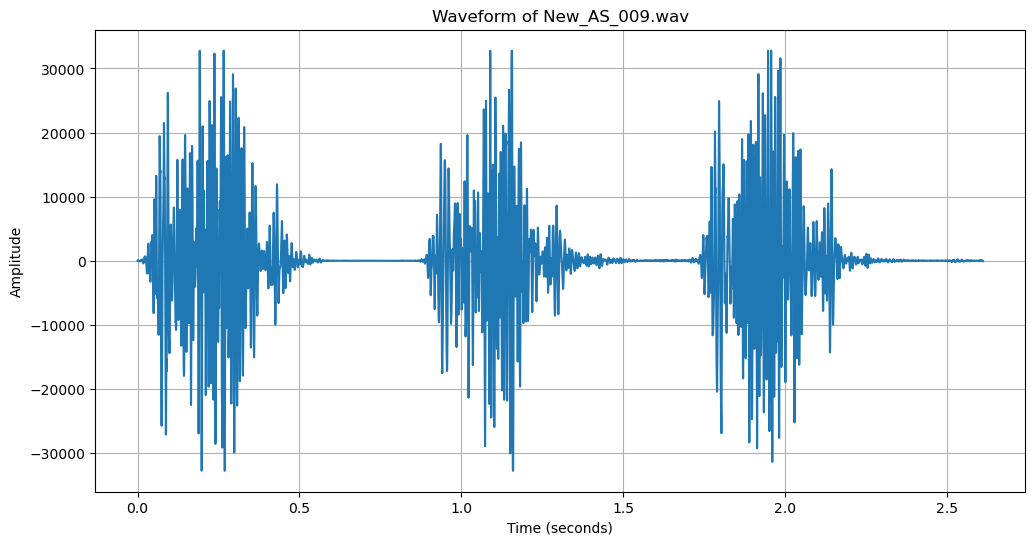

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create a time array in seconds
duration = len(data) / sample_rate
time = np.linspace(0, duration, num=len(data))
# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(time, data)
plt.title("Waveform of New_AS_009.wav")
plt.xlabel("Time (seconds)")    
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

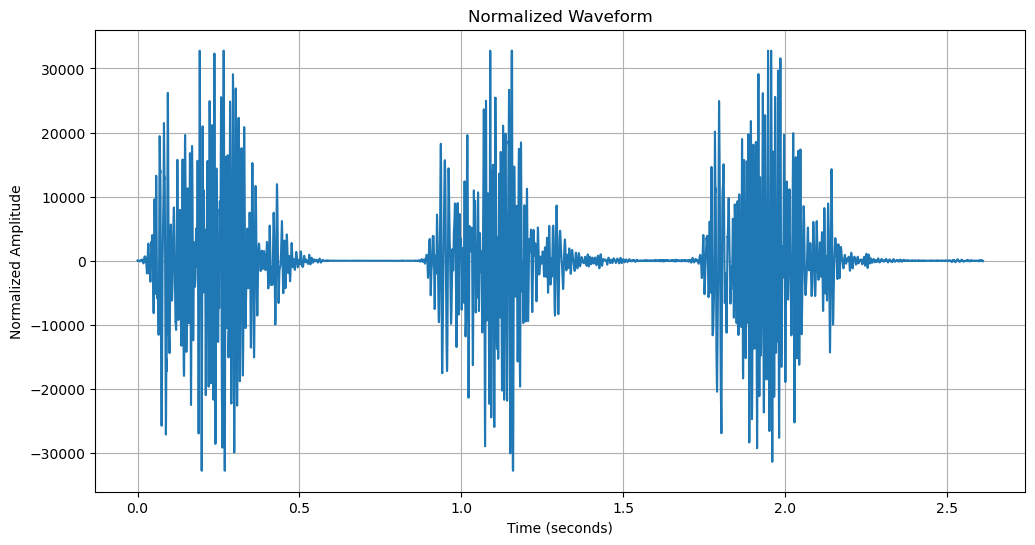

In [5]:
# Plot the normalized waveform
normalized_data = data / np.max(np.abs(data))
plt.figure(figsize=(12, 6))
plt.plot(time, data)
plt.title("Normalized Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.grid(True)
plt.show()

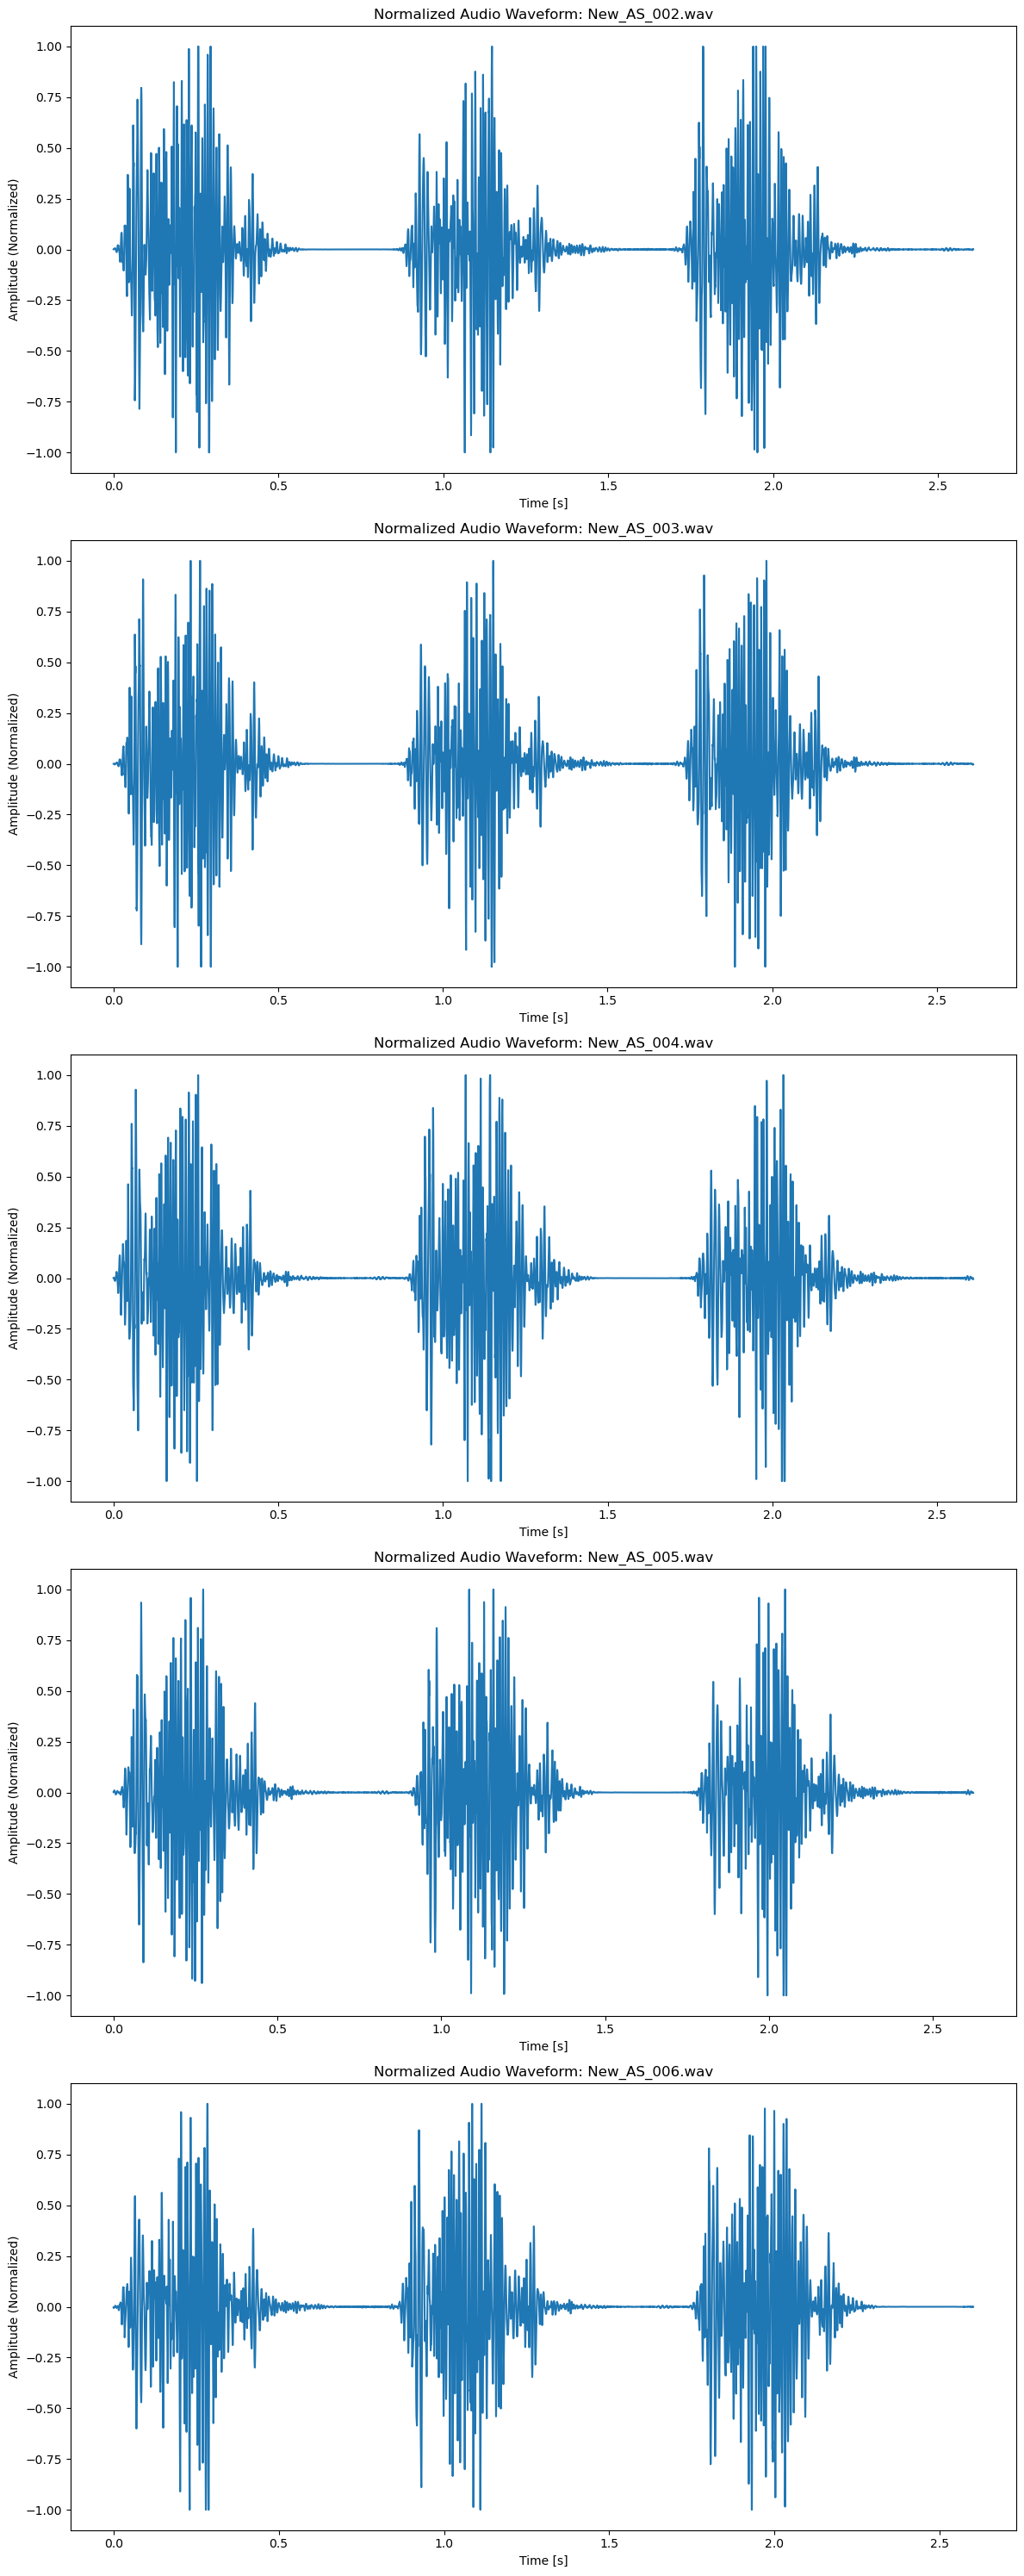

In [9]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import os

file_paths = ["New_AS_002.wav", "New_AS_003.wav", "New_AS_004.wav", "New_AS_005.wav", "New_AS_006.wav"]


fig, axes = plt.subplots(len(file_paths), 1, figsize=(12, 6 * len(file_paths)))

for i, file_path in enumerate(file_paths):
    sample_rate, data = wavfile.read(file_path)
    time = data.shape[0] / sample_rate
    time_array = np.linspace(0., time, data.shape[0])
    normalized_data = data / np.max(np.abs(data))

    axes[i].plot(time_array, normalized_data)
    axes[i].set_xlabel("Time [s]")
    axes[i].set_ylabel("Amplitude (Normalized)")
    axes[i].set_title(f"Normalized Audio Waveform: {os.path.basename(file_path)}")

plt.tight_layout()
plt.show()

Sample Rate: 8000 Hz
Data shape: (20849,)
Duration: 2.606125 seconds


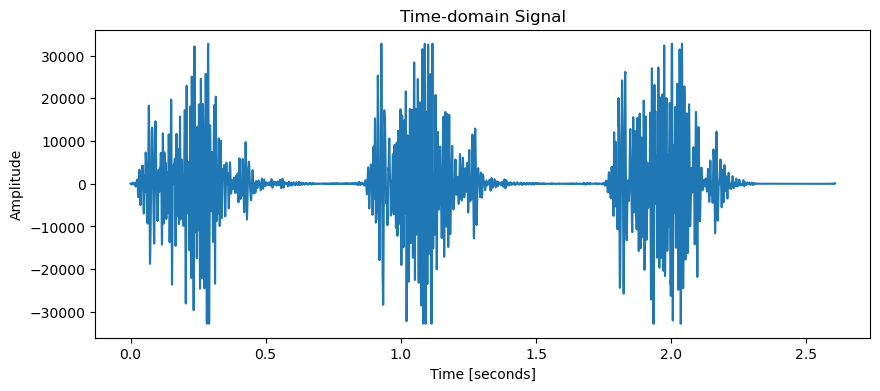

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Step 1: Load the .wav file
sample_rate, data = wavfile.read('New_AS_001.wav')

# Print general information
print(f"Sample Rate: {sample_rate} Hz")
print(f"Data shape: {data.shape}")
print(f"Duration: {data.shape[0] / sample_rate} seconds")

# Step 2: Plot the time-domain signal (Amplitude vs Time)
time = np.linspace(0, data.shape[0] / sample_rate, num=data.shape[0])

plt.figure(figsize=(10, 4))
plt.plot(time, data)
plt.title("Time-domain Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
# plt.grid(True)
plt.show()